# Training Deep Neural Networks

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UAPH4582/PH482_582_Sp22/blob/main/Exercises/06_training_deep_neural_networks.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [1]:
group_name = "LPC Group 2"
names = ["Mariana Soeiro", "Thales Menezes de Oliveira"]

Due date: 2022-03-14

File name convention: For group 42 and memebers Richard Stallman and Linus Torvalds it would be 
"06_training_deep_neural_networks.pdf".

Submission via blackboard (UA) or Google Form (see notion, LPC).

Feel free to answer free text questions in text cells using markdown and possibly $\LaTeX{}$ if you want to.

**You don't have to understand every line of code here and it is not intended for you to try to understand every line of code.   
Big blocks of code are usually meant to just be clicked through.**

# Setup

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Vanishing/Exploding Gradients Problem

### TASK 1: Sigmoid, Relu, Leaky Relu

In [3]:
def logit(z):
    return 1 / (1 + np.exp(-z))

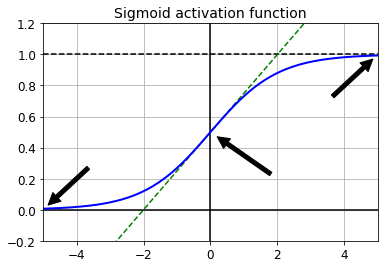

In [4]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

**Task 1 a)** Describe the sigmoid activation function.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 1 a) answer: The sigmoid consists in a function that returns the value of 1 for larger values of the inputs, either they are positive or negative, since it has a exponential behaviour. Is a function that saturates at 0 and 1, and because of this behaviour it has a derivative closer to 0 in these points. The sigmoid function also presents a linear behaviour for input values close to 0, with a constant derivative for these points. 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

### Leaky ReLU

**Task 1 b)** Write the [leaky relu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)#Leaky_ReLU) function `leaky_relu(z)`.
It should take `z` as argument and also another optional argument `alpha` with default value 0.01.
The leaky relu funciton is defined to be `alpha*z` for z<0 and `z` for z>0.

(alterntively you can think about using `np.maximum` to make the distinction, assuming alpha>0)

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [7]:
def leaky_relu(z,alpha):
    return np.maximum(alpha*z,z) # max(alpha*z,z)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

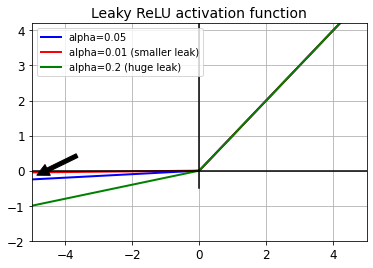

In [14]:
plt.plot(z, leaky_relu(z, alpha=0.05), "b-", linewidth=2, label='alpha=0.05')
plt.plot(z, leaky_relu(z, alpha=0.01), "r-", linewidth=2, label='alpha=0.01 (smaller leak)')
plt.plot(z, leaky_relu(z, alpha=0.2), "g-", linewidth=2, label='alpha=0.2 (huge leak)')
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -2., 4.2])
plt.legend(loc='best')

plt.show()

**Task 1c)** Describe the difference between relu and leaky relu?
Also explain why one might want to use leaky relu.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 1c) answer: The ReLU function returns 0 por z < 0, while the Leaky ReLU returns values different of 0 for z < 0, and it is possible to define the slope of the function for these negative values with the hyperparameter alpha.


The Leaky ReLU was proposed to solve the dying gradient problem from ReLU. During the network's training, if the weighted sum of neurons' input are negative, the neurons will start output 0. In this scenario, it is unlikely that the neuron will output anything different of 0 because the gradient of the ReLU is 0 for negative input values.



↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

##### Let's train a neural network on Fashion MNIST using the Leaky ReLU:

In [15]:
# load fashion MNIST + train_test split
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [16]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),              ## 28x28 --> 784 dimensions 
    keras.layers.Dense(300, kernel_initializer="he_normal"), # LeakyReLU + He weights initialization
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7955 - accuracy: 0.7362 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7902
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8200
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5338 - accuracy: 0.8225 - val_loss: 0.5157 - val_accuracy:

### TASK 2: ELU
**Task 2 a)** Describe the [ELU activation](https://paperswithcode.com/method/elu) function and compare to LeakyRelu. The definition is described in Chapter 11 or alternatively [here](https://paperswithcode.com/method/elu).   

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 2 a) answer: The ELU activation function is composed by a exponential function for z < 0 and a linear function for z > 0. Since the ELU have a exponential function for z < 0, it has a nonzero gradient for these points, which avoids the dying neurons scenario. Since the ELU function is smooth everywhere, including z = 0, the gradient descent method are optimized, especially for values close to 0, even with a slower time to compute, with the relation to ReLU and its other variants.


↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

**Task 2 b)** Similar to `leaky_relu` above, write the function `elu(z)` with optional argument `alpha=1` (meaning that the default value is 1).

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [62]:
type(z[0])

numpy.float64

In [77]:
#pytorch definition https://github.com/pytorch/pytorch/blob/96aaa311c0251d24decb9dc5da4957b7c590af6f/torch/nn/modules/activation.py#L422

def torch_elu(z,alpha):
    return np.maximum(0,z) + np.minimum(0, alpha*(np.exp(z) - 1))   

In [78]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

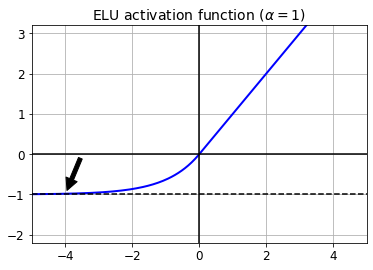

In [82]:
plt.plot(z, torch_elu(z,alpha=1.0), "b-", linewidth=2)
#plt.plot(z, elu(z,alpha=1.0), "r-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.annotate('', xytext=(-3.5, 0), xy=(-4, -1), arrowprops=props, fontsize=14, ha="center")
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [83]:
tf.random.set_seed(42)
np.random.seed(42)

To use the elu activation function in TensorFlow you need to specify the activation function when building each layer (Check on https://keras.io/api/layers/activations/ for some examples): `activation='relu'`

**Task 2 c)** Using the layers from the previous model (LeakyRelu), train with ELU activation

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [84]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal", activation='elu'),
    keras.layers.Dense(100, kernel_initializer="he_normal", activation='elu'),
    keras.layers.Dense(10, activation="softmax")
])

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [85]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [86]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.1201 - accuracy: 0.6462 - val_loss: 0.7927 - val_accuracy: 0.7376
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7228 - accuracy: 0.7570 - val_loss: 0.6571 - val_accuracy: 0.7822
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.6316 - accuracy: 0.7878 - val_loss: 0.5999 - val_accuracy: 0.8022
Epoch 4/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.5824 - accuracy: 0.8044 - val_loss: 0.5562 - val_accuracy: 0.8216
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5508 - accuracy: 0.8149 - val_loss: 0.5306 - val_accuracy: 0.8268
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5281 - accuracy: 0.8201 - val_loss: 0.5113 - val_accuracy: 0.8294
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5108 - accuracy: 0.8253 - val_loss: 0.4957 - val_accur

## Task 3: Batch Normalization
**Task 3 a)** Build a NN with two hidden layers with 300 and 100 nodes. Use RELU as activation function. Add [BatchNormalization](https://keras.io/api/layers/normalization_layers/batch_normalization/) layers before each dense layer (check the definition in Chapter 11)   

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    # ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ 

    # ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ 
    keras.layers.Dense(10, activation="softmax")
])

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

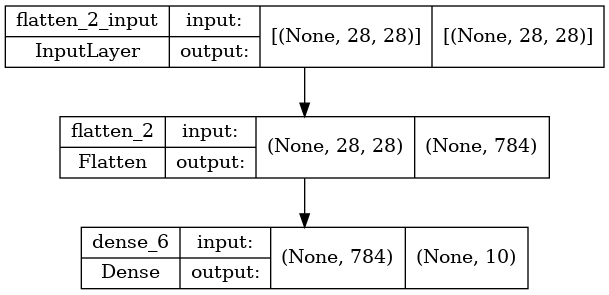

In [16]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=25,
                    validation_data=(X_valid, y_valid))

**Task 3 b)** Explain what batch normalization does and discuss the results of above training.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 3b) answer:

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Task 4: Reusing a Keras model

Let's split the fashion MNIST training set in two:
* `X_train_A`: all images of all items except for sandals and shirts (classes 5 and 6).
* `X_train_B`: a much smaller training set of just the first 200 images of sandals or shirts.

The validation set and the test set are also split this way, but without restricting the number of images.

We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts). However, since we are using `Dense` layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer much better, since learned patterns can be detected anywhere on the image, as we will see in the CNN chapter).

In [18]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [23]:
tf.random.set_seed(42)
np.random.seed(42)

In [24]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [25]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

/home/mknipfer/anaconda3/envs/DelayLineDetector/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

In [28]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [29]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

In [33]:
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

Note that `model_B_on_A` and `model_A` actually share layers now, so when we train one, it will update both models. If we want to avoid that, we need to build `model_B_on_A` on top of a clone of `model_A`:

In [34]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [35]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=20,
                           validation_data=(X_valid_B, y_valid_B))

Task 4:
a) Evaluate the loss and accuracy of the two models `model_B` and `model_B_on_A` on the sandals/shirts dataset. 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

b) In your own words, explain above "transfer learning". Did it help?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Task 5: Learning Rate Scheduling
Let's add a an exponential decay of the learning rate:

We will use the following learning rate schedule (exponential):   
$ lr = lr_0 \cdot 0.1 ^ {epoch / 20}$

In [70]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

**Task 5:** 
- Build a NN with: two hidden layers with 300 and 100 nodes, add BatchNormalization layers before the dense layers,
- compile the model with `"sparse_categorical_crossentropy"` as `loss`, `"nadam"` for the `optimizer` and `["accuracy"]` as `metrics`,
- fit the model to `X_train` and `y_train` for 25 epochs. Use `(X_valid, y_valid)` for the `validation_data` and add the exponential decay through `callbacks=[lr_scheduler]`.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [ ]:
# note that the model is overfitting a lot. Might want to use dropout
# also a CNN will perform much better as we will see next Hands-On
print("train loss:", model.evaluate(X_train, y_train))
print("test loss:", model.evaluate(X_test, y_test))

In [ ]:
# the learning rate is saved in the history under the key 'lr' 
history.history.keys()

In [ ]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

Note: If you want to use learning rate decay, it is probably better to use a Keras built in function like [ExponentialDecay](https://keras.io/api/optimizers/learning_rate_schedules/exponential_decay/) and not program it yourself.

## Task 6: Performance Scheduling

For performance scheduling, use the `ReduceLROnPlateau` callback. For example, if you pass the following callback to the `fit()` method, it will multiply the learning rate by 0.5 whenever the best validation loss does not improve for two consecutive epochs:

`lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2)`

**Task 6:**   
a) Re-use (copy-pasta) the NN from Task 5: two hidden layers with 300 and 100 nodes and BatchNormalization layers before the dense layers. But, now use Adam optimizer with a initial lr=0.01,   
b) Compare the results with the previous one (Task 5),   
c) Comment on the learning rate as a function of epochs using the plot given below.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

Task 6 c) answer:

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Task 7 Avoiding Overfitting Through Regularization
Our models above all overfit (why?). Let's now tackle this problem using dropout.

**Task 7:**   
a) Copy the code for the model of Task 6, add a dropout (20% rate) before each hidden layer (https://keras.io/api/layers/regularization_layers/dropout/),    
b) Compare the results.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [94]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2981 - accuracy: 0.8925


[0.2980549931526184, 0.8924999833106995]

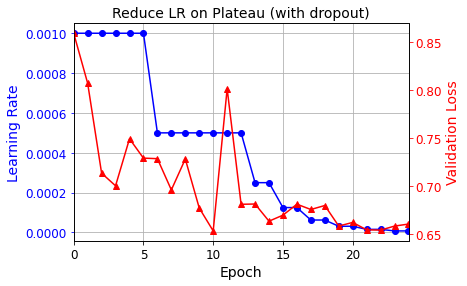

In [97]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau (with dropout)", fontsize=14)
plt.show()

# Optional Exercise (Bonus points): Using Callbacks during Training

**Task 8:** Add to your model of Task 7 the following callbacks (check Chapter 10 and https://keras.io/api/callbacks/)   
a) Checkpoint   
b) Early stopping (5 epochs)   
c) Tensorboard log   
d) Discuss the result 

You can use the code snippets below.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [98]:
# model = 

In [ ]:
#Define callbacks
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2)
early_stopping_cb = 
model_checkpoint_cb =
tensorboard_cb =

In [ ]:
callbacks = [lr_scheduler, early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.01)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 50
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=callbacks)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_fashion_logs --port=6006

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above